# Importing all the required modules

In [1]:
library(readr)
library(dplyr)
library(stringr)
library(ggplot2)
library(tidyr)
library(tm)
library(textstem) 
library(tidytext)
library(wordcloud2)
library(pROC)
library(ROCR)
library(randomForest)  
library(naivebayes)
library(caret)
library(janeaustenr)
library(igraph)
library(ggraph)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate


Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attaching package: 'koRpus'


The following object is masked from 'package:tm':

    readTagged


The following object is masked from 'package:readr':

    tokenize


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The f

# Importing required datasets

In [2]:
fake <- read_csv('Fake.csv')
true <- read_csv('True.csv')


-- Column specification ------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  title = col_character(),
  text = col_character(),
  subject = col_character(),
  date = col_character()
)



-- Column specification ------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  title = col_character(),
  text = col_character(),
  subject = col_character(),
  date = col_character()
)




In [3]:
head(fake,1)
head(true,1)

title,text,subject,date
<chr>,<chr>,<chr>,<chr>
Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017"


title                                                           
1 As U.S. budget fight looms, Republicans flip their fiscal script
  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Data Decription and Data Cleaning

### The data required for this project is present in two datafiles of csv format. The files are namely true.csv and fake.csv. The true.csv files contains news that are true and similarly for Fake.csv which contains fake news.

### Number of columns

In [4]:
print("The number of columns in true.csv")
dim(true)
print("The number of columns in fake.csv")
dim(fake)

[1] "The number of columns in true.csv"


[1] 21417     4

[1] "The number of columns in fake.csv"


[1] 23481     4

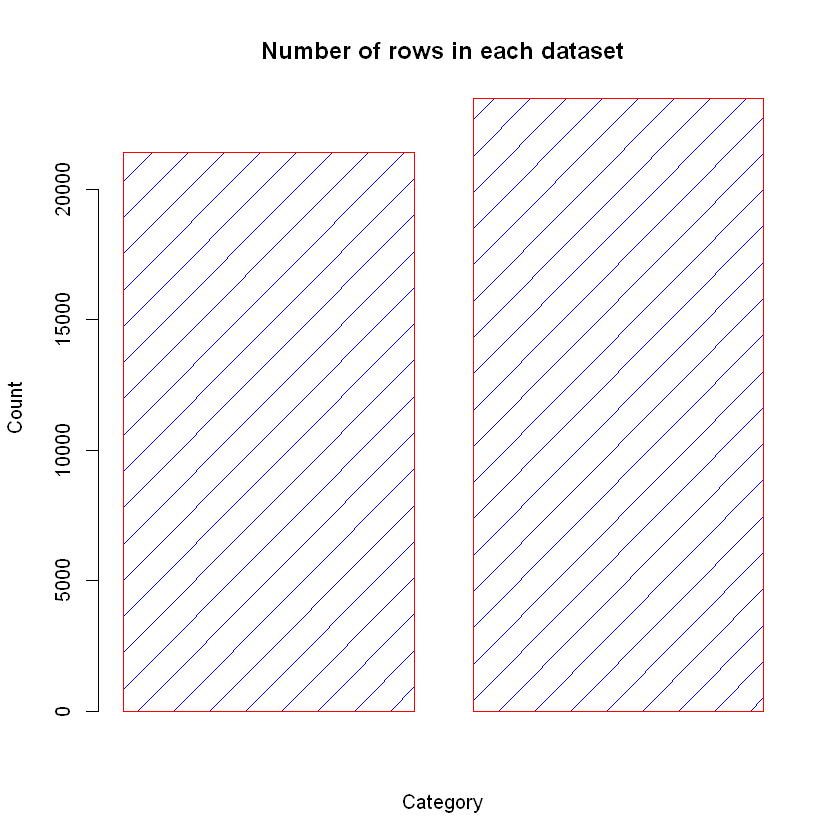

In [5]:
barplot(c(nrow(true) , nrow(fake)) , 
        main="Number of rows in each dataset",
        xlab="Category",
        ylab="Count",
        border="red",
        col="blue",
       density = 5)

## Both the datasets are balanced.

### Columns datatypes

In [6]:
glimpse(true)
glimpse(fake)

Rows: 21,417
Columns: 4
$ title   <chr> "As U.S. budget fight looms, Republicans flip their fiscal ...
$ text    <chr> "WASHINGTON (Reuters) - The head of a conservative Republic...
$ subject <chr> "politicsNews", "politicsNews", "politicsNews", "politicsNe...
$ date    <chr> "December 31, 2017", "December 29, 2017", "December 31, 201...
Rows: 23,481
Columns: 4
$ title   <chr> "Donald Trump Sends Out Embarrassing New Year’s Eve Message...
$ text    <chr> "Donald Trump just couldn t wish all Americans a Happy New ...
$ subject <chr> "News", "News", "News", "News", "News", "News", "News", "Ne...
$ date    <chr> "December 31, 2017", "December 31, 2017", "December 30, 201...


### Are any NA values present?

In [7]:
sum(is.na(true))
sum(is.na(fake))

[1] 1

[1] 630

In [8]:
## Percentage of total dataset

sum(is.na(true))/nrow(true)*100
sum(is.na(fake))/nrow(fake)*100

[1] 0.004669188

[1] 2.68302

### As we can see that NA values are present and when compared to the total numbers of rows they are only 0.004%  and 2.68% of the total dataset. Instead of predicting them we can just drop them because large amount of data is not lost.

In [9]:
true <- true %>% drop_na()
fake <- fake %>% drop_na()

In [10]:
dim(true)
dim(fake)

[1] 21416     4

[1] 22851     4

### Summary of datasets

In [11]:
summary(fake)
summary(true)

    title               text             subject              date          
 Length:22851       Length:22851       Length:22851       Length:22851      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

    title               text             subject              date          
 Length:21416       Length:21416       Length:21416       Length:21416      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

# Merging datasets for further preprocessing

In [12]:
fake$y <- 0
true$y <- 1
news <- bind_rows(fake, true)

## since the y column is of categorical type and the models will consider it of numerical if we do not convert it to factor.
## The same applies for the subject columns
news$y <- as.factor(news$y)
news$subject <- as.factor(news$subject)

# Preprocessing

In [13]:
# News count by each Subject
news %>% group_by(subject) %>% count() %>% arrange(desc(n))

subject,n
<fct>,<int>
politicsNews,11271
worldnews,10145
News,9050
politics,6433
left-news,4309
Government News,1498
US_News,783
Middle-east,778


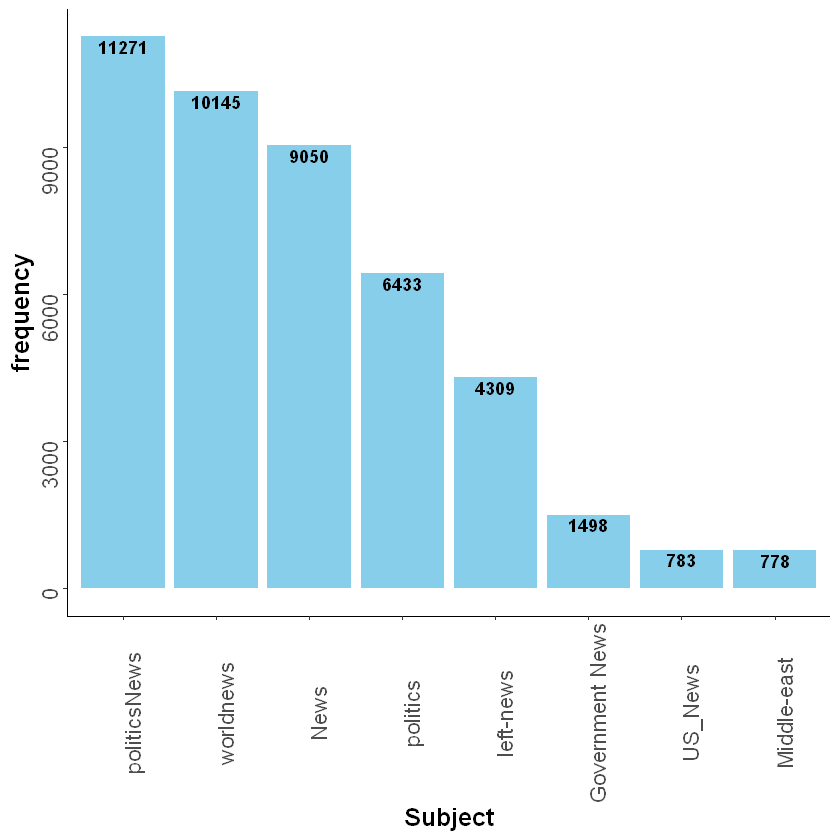

In [14]:
news %>%
  group_by(subject) %>%
  count(sort = TRUE) %>%
  rename(freq = n) %>%
  ggplot(aes(x = reorder(subject, -freq), y = freq)) + 
  geom_bar(stat = 'identity', fill = 'skyblue') +
  theme_classic() +
  xlab('Subject') +
  ylab('frequency') +
  geom_text(aes(label = freq), vjust = 1.2, fontface = 'bold') +
  theme(axis.title = element_text(face = 'bold', size = 15),
        axis.text = element_text(size = 13, angle = 90))

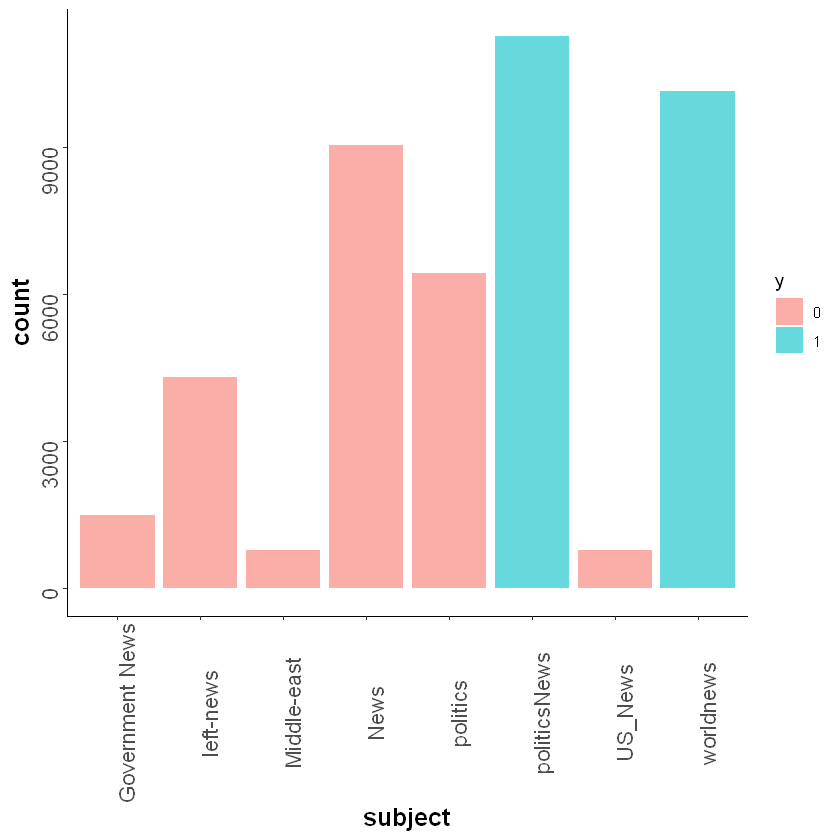

In [15]:
## Categoty wise news subject plot

ggplot(news, aes(x = subject , fill = y)) +
  geom_bar(position = 'dodge', alpha = 0.6) +
  theme_classic() +
  theme(axis.title = element_text(face = 'bold', size = 15),
        axis.text = element_text(size = 13, angle = 90))

## A news article is the combination of its heading and the text written below the heading. So we merge the title and text column into one. Reducing the dimension of the dataset. 

## We can also see that the subject column is biased in nature and will lead to decreased accuracy. So we drop that column

In [16]:
y = news$y
news$text <- paste(news$title , news$text , sep = ' ')
news <- cbind(news["text"] , y)
glimpse(news)

Rows: 44,267
Columns: 2
$ text <chr> "Donald Trump Sends Out Embarrassing New Year’s Eve Message; T...
$ y    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...


# N-Gram Analysis

## Uni Gram Analysis

In [ ]:
tokeniztion_df <- news %>% unnest_tokens(word, text)
tokeniztion_df <- tokeniztion_df %>% anti_join(stop_words)

Joining, by = "word"



In [ ]:
tokeniztion_df %>% count(word, sort = TRUE) %>% filter(n > 25000) %>% mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word)) +
  geom_col() +
  labs(y = NULL)

In [ ]:
#Unigram - Fake_News
tokeniztion_df_fake <- fake_news %>% unnest_tokens(word, text)
tokeniztion_df_fake <- tokeniztion_df_fake %>% anti_join(stop_words)
tokeniztion_df_fake %>% count(word, sort = TRUE) %>% filter(n > 10000) %>% mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word , fill = n)) +
  geom_col() +
  labs(y = NULL) +
  theme_minimal()

In [ ]:
#Unigram - True_News
tokeniztion_df_true <- true_news %>% unnest_tokens(word, text)
tokeniztion_df_true <- tokeniztion_df_true %>% anti_join(stop_words)
tokeniztion_df_true %>% count(word, sort = TRUE) %>% filter(n > 10000) %>% mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word,fill = n)) +
  geom_col() +
  labs(y = NULL)+
  theme_minimal()

## Bi Gram Analysis

In [ ]:
fake_news <- news%>%filter(y == 0)
true_news <- news%>%filter(y == 1)

In [ ]:
df_bigrams <-  fake_news %>% unnest_tokens(bigram, text, token = "ngrams", n = 2)
bigrams_separated <- df_bigrams %>% separate(bigram, c("word1", "word2"), sep = " ") %>% filter(!word1 %in% stop_words$word) %>% filter(!word2 %in% stop_words$word)
bigram_counts <- bigrams_separated %>%  count(word1, word2, sort = TRUE)
bigram_graph <- bigram_counts %>% filter(n > 1000) %>% graph_from_data_frame()
set.seed(2017)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)

In [ ]:
fak_bigram <- data.frame(word <- paste(bigram_counts$word1 , bigram_counts$word2 , sep = " "))
fak_bigram$n <- bigram_counts$n
fak_bigram <- fak_bigram %>% filter(n > 1000)
names(fak_bigram) <- c("word" , "n")

In [ ]:
fak_bigram %>% arrange(desc(n)) %>% mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word,fill = n)) +
  geom_col() +
  labs(y = NULL) + 
  theme_minimal()

In [ ]:
tdf_bigrams <-  true_news %>% unnest_tokens(bigram, text, token = "ngrams", n = 2)
tbigrams_separated <- tdf_bigrams %>% separate(bigram, c("word1", "word2"), sep = " ") %>% filter(!word1 %in% stop_words$word) %>% filter(!word2 %in% stop_words$word)
tbigram_counts <- tbigrams_separated %>%  count(word1, word2, sort = TRUE)
tbigram_graph <- tbigram_counts %>% filter(n > 1000) %>% graph_from_data_frame()
set.seed(2017)
ggraph(tbigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)

In [ ]:
tru_bigram <- data.frame(paste(tbigram_counts$word1 , tbigram_counts$word2 , sep = " "))
tru_bigram$n <- tbigram_counts$n
ttru_bigram <- tru_bigram %>% filter(n > 1200)
names(ttru_bigram) <- c("word" , "n")

In [ ]:
ttru_bigram %>% arrange(desc(n)) %>% mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word , fill = n)) +
  geom_col() +
  labs(y = NULL) + 
  theme_minimal()

## We implement various test preprocessing technique

* to lowercase
* remove numbers
* remove punctutaions
* remove stopwords 
* remove whitespaces
* Lemmatization
* Tokenization

In [ ]:
library(readr)
library(dplyr)
library(stringr)
library(ggplot2)
library(tidyr)
library(tm)
library(textstem) 
library(tidytext)
library(wordcloud2)
library(pROC)
library(ROCR)
library(randomForest)  
library(naivebayes)
library(caret)
library(janeaustenr)
library(igraph)
library(ggraph)

## Importing data
fake <- read_csv('../input/fake-and-real-news-dataset/Fake.csv')
true <- read_csv('../input/fake-and-real-news-dataset/True.csv')
##Dropping NA rows
true_news <- true_news %>% drop_na()
fake_news <- fake_news %>% drop_na()
## Merging Datasets
fake_news$type <- 0
true_news$type <- 1
news <- bind_rows(fake_news, true_news)
news$type <- as.factor(news$type)
type = news$type
news$text <- paste(news$title , news$text , sep = ' ')
news <- cbind(news["text"] , type)
data <- news

In [ ]:
data <- news[sample(nrow(data)),]

In [ ]:
  ##Preprocessing
  doc <- VCorpus(VectorSource(data$text))
  doc <- tm_map(doc, removePunctuation)
  doc <- tm_map(doc, removeNumbers)
  doc <- tm_map(doc, content_transformer(tolower))
  doc <- tm_map(doc, removeWords, stopwords("english"))
  doc <- tm_map(doc, stripWhitespace)
  doc <- tm_map(doc, content_transformer(lemmatize_strings))

In [ ]:
  ## Data Preparation
  dtm <- DocumentTermMatrix(doc)
  dtm_clean <- removeSparseTerms(dtm, sparse = 0.99)
  dtm_mat <- as.matrix(dtm_clean)
  y_prediction = data$type
  dtm_mat <- cbind(dtm_mat,y_prediction)
  dtm_df <- as.data.frame(dtm_mat)

In [ ]:
 summary(dtm_df$y_prediction)

In [ ]:
 dtm_df$y_prediction <- ifelse(dtm_df$y_prediction == 2, 1, 0)
 dtm_df$y_prediction <- as.factor(dtm_df$y_prediction)

In [ ]:
  ## Train Test Split
  set.seed(2020)
  index <- sample(nrow(dtm_df), nrow(dtm_df)*0.8, replace = FALSE)
  train_set <- dtm_df[index,]
  test_set <- dtm_df[-index,]
  names(train_set) <- make.names(names(train_set))
  names(test_set) <- make.names(names(test_set))

In [ ]:
  ## Fitting Model
  #Random Forest
  k <- round(sqrt(ncol(train_set)-1))
  clf_rf <- randomForest(formula = y_prediction ~ .,data = train_set,ntree = 5 ,mtry = k,method = 'class')
  
  #Naive Bayes
  clf_nb <- naive_bayes(y_prediction ~ ., data = train_set)

In [ ]:
  ##Meta Classifier Stacking
  # Predicted values
  train_set$pred_nb <- as.factor(predict(clf_nb, type = 'class'))
  train_set$pred_rf <- as.factor(predict(clf_rf, type = 'response'))
  
  # Predicted Values for test set
  test_set$pred_nb <- as.factor(predict(clf_nb, newdata = test_set))
  test_set$pred_rf <- as.factor(predict(clf_rf, newdata = test_set, type = 'response'))
  
  #Stacking
  train_set <- train_set[c("pred_nb" , "pred_rf" , "y_prediction")]
  test_set <-  test_set[c("pred_nb" , "pred_rf" , "y_prediction")]

In [ ]:
 ##Logistics Regression
  clf_lr <- glm(formula = y_prediction~.,  data = train_set, family=binomial(link="logit"))

In [ ]:
  test_set$pred_lr <- predict(clf_lr, newdata = test_set, type = 'response')
  test_set$pred_lr <- ifelse(test_set$pred_lr > 0.5,1,0)
  test_set$pred_lr <- as.factor(test_set$pred_lr)

In [ ]:
# Confussion Matrix
conf <- confusionMatrix(reference = test_set$y_prediction, data = test_set$pred_lr)
conf_nb <- caret::confusionMatrix(test_set$y_prediction, test_set$pred_nb)
conf_rf <- caret::confusionMatrix(test_set$y_prediction, test_set$pred_rf)

In [ ]:
draw_confusion_matrix(conf)
draw_confusion_matrix(conf_nb)
draw_confusion_matrix(conf_rf)

In [ ]:
draw_confusion_matrix <- function(cm) {
  
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  t <- deparse(substitute(cm))
  title(paste0('CONFUSION MATRIX',t,sep = "  "), cex.main=2)
  
  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)
  
  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')
  
  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)
  
  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}